In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('patients.csv')

In [3]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [4]:
pd.DataFrame(df['gender'].value_counts())

,gender
Female,58552
Male,41430
Other,18


In [5]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [6]:
df['gender'].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [7]:
df.dropna

<bound method DataFrame.dropna of        gender   age  diabetes  hypertension  stroke  heart disease  \
0      Female  80.0         0             0       0              1   
1      Female  54.0         0             0       0              0   
2        Male  28.0         0             0       0              0   
3      Female  36.0         0             0       0              0   
4        Male  76.0         0             1       0              1   
...       ...   ...       ...           ...     ...            ...   
99995  Female  80.0         0             0       0              0   
99996  Female   2.0         0             0       0              0   
99997    Male  66.0         0             0       0              0   
99998  Female  24.0         0             0       0              0   
99999  Female  57.0         0             0       0              0   

      smoking history    BMI  
0               never  25.19  
1                 NaN    NaN  
2               never    NaN  
3

In [8]:
df.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35810
BMI                25437
dtype: int64

In [9]:
def impute_bmi(cols):
    BMI = cols[0]
    gender = cols[1]
    
    if pd.isnull(BMI):

        if gender == 'female':
            return 24

        elif gender == 'male':
            return 26

        else:
            return 30

    else:
        return BMI

In [10]:
df['BMI'] = df[['BMI','gender']].apply(impute_bmi,axis=1)

In [11]:
def impute_sh(cols):
    smoking_history = cols[0]
    BMI = cols[1]
    
    if pd.isnull(smoking_history):

        if BMI == 25:
            return 'never'

        elif BMI == 26:
            return 'current'
        
        elif BMI == 28:
            return 'former'
        
        elif BMI == 26:
            return 'ever'

        else:
            return 'not current'

    else:
        return smoking_history

In [12]:
df['smoking history'] = df[['smoking history','BMI']].apply(impute_sh,axis=1)

In [13]:
df.isnull().sum()

gender             0
age                0
diabetes           0
hypertension       0
stroke             0
heart disease      0
smoking history    0
BMI                0
dtype: int64

In [14]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [15]:
smoked = pd.get_dummies(df['smoking history'],drop_first=True,prefix='smoked')

In [16]:
df = pd.concat([df,smoked],axis=1)

In [17]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00,0,0,0,1
99996,Female,2.0,0,0,0,0,not current,17.37,0,0,0,1
99997,Male,66.0,0,0,0,0,former,27.83,0,1,0,0
99998,Female,24.0,0,0,0,0,never,35.42,0,0,1,0


In [18]:
gndr = pd.get_dummies(df['gender'],drop_first=True,prefix='gndr')

In [19]:
df = pd.concat([df,gndr],axis=1)

In [20]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current,gndr_Male
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1,0
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0,1
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,0,0,not current,30.00,0,0,0,1,0
99996,Female,2.0,0,0,0,0,not current,17.37,0,0,0,1,0
99997,Male,66.0,0,0,0,0,former,27.83,0,1,0,0,1
99998,Female,24.0,0,0,0,0,never,35.42,0,0,1,0,0


In [21]:
df.drop(['smoking history'],1,inplace=True)

In [22]:
df.keys()

Index(['gender', 'age', 'diabetes', 'hypertension', 'stroke', 'heart disease',
       'BMI', 'smoked_ever', 'smoked_former', 'smoked_never',
       'smoked_not current', 'gndr_Male'],
      dtype='object')

In [23]:
x=df[['age', 'diabetes','stroke', 'heart disease', 'BMI', 'smoked_ever', 'smoked_former',
       'smoked_never', 'smoked_not current', 'gndr_Male']]
y=df['hypertension']

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

                Specs         Score
0                 age  76342.944594
1            diabetes   3579.607070
4                 BMI   2995.956121
3       heart disease   1411.998880
8  smoked_not current    738.948193
6       smoked_former    629.380437
2              stroke    594.173356
7        smoked_never    136.262021
5         smoked_ever     51.354211
9           gndr_Male     12.109606


In [25]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [26]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear',multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion ='entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3, random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [31]:
predictions = logmodel.predict(x_test)
pd.DataFrame(predictions).head(50)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
cm_log = confusion_matrix(y_test, predictions)
cm_log

array([[30762,    45],
       [ 2489,    32]], dtype=int64)

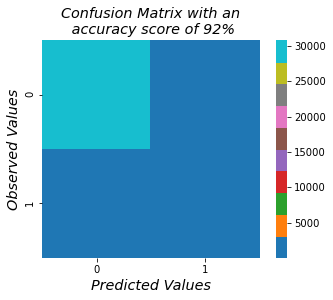

In [34]:
sns.heatmap(cm_log, vmin=None,vmax=None,cmap='tab10',center=None,robust=False,annot=None,fmt='.5g',annot_kws=None,linewidths=0,xticklabels='auto',
    yticklabels='auto',linecolor='white',square=True)
plt.ylabel('Observed Values',fontstyle='italic', fontsize='x-large')
plt.xlabel('Predicted Values',fontstyle='italic', fontsize='x-large')
plt.title('Confusion Matrix with an\n accuracy score of 92%',fontstyle='italic',fontsize='x-large')

plt.savefig('1.png')

In [35]:
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

92.39678348535766


In [36]:
# seed = 0
# results = []
# names = []
# for name, model in classifier:
#     kfold = model_selection.KFold(n_splits=10, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)


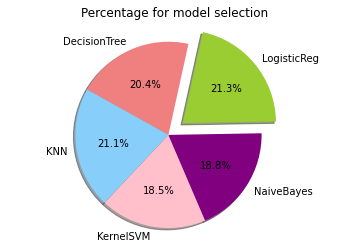

<Figure size 720x504 with 0 Axes>

In [37]:
labels = 'LogisticReg', 'DecisionTree', 'KNN','KernelSVM','NaiveBayes'
sizes = [0.924521 ,0.884463,0.916104, 0.802041 , 0.818367]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue','pink','purple']
explode = (0.2,0, 0, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=1)
plt.rcParams['figure.figsize']=(10,7)
plt.axis('equal')
plt.title('Percentage for model selection')
plt.show()
plt.savefig('2.png')

In [38]:
df["hypertension"].value_counts()

0    92497
1     7485
Name: hypertension, dtype: int64